1950: 365 days, all days detected and tracked  
1951: 365 days, all days detected and tracked  
1952: 366 days, 365 days detected  
1953: 365 days, all days detected  
1954: 365 days, all days detected  
1955: 365 days, all days detected  
1956: 365 days, all days detected

2013: 365 days, all days detected and tracked  
2014: 365 days, all days detected  
2015: 365 days, all days detected and tracked  
2016: 366 days, all days detected and tracked  
2020: 366 days, all days detected and tracked

2093: 365 days, all days detected and tracked  
2094: 365 days, all days detected  
2096: 366 days, all days detected and tracked  
2099: 365 days, all days detected and tracked  
2100: 366 days, all days detected

In [2]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import os
import xarray as xr
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
from pathlib import Path
from lkf_tools.dataset import *
import warnings
warnings.filterwarnings('ignore')

In [3]:
base_path = '/work/bk1377/a270230/'

path_ice  = base_path + 'interpolated_fesom_output/'
path_lkfs = base_path + 'lkfs/daily_data/'
path_ds   = base_path + 'lkf_datasets/daily_data/'

files = os.listdir(path_ds)
files.sort()
files

['.ipynb_checkpoints',
 'ds_2013.npy',
 'ds_2014.npy',
 'ds_2015.npy',
 'ds_2016.npy',
 'ds_2020.npy',
 'ds_2093.npy',
 'ds_2096.npy',
 'ds_2099.npy',
 'fesom_ifs']

# Create new dataset

In [4]:
year = 2014

In [14]:
lkf_data = process_dataset(path_ice + f'ice_{year}.nc', output_path=path_lkfs, dog_thres=0.05, t_red=1, lmin=5)

  -->  Compute dxu and dyu from lon,lat using SSMI projection


In [15]:
lkf_data.detect_lkfs(indexes=[0])

Compute deformation rates and detect features for day 1
Start detection routines


In [16]:
lkf_data.track_lkfs(indexes=[0])

In [17]:
lkf_data.indexes = np.arange(len(xr.open_dataset(path_ice + f'ice_{year}.nc').time))

In [18]:
np.save(path_ds + f'ds_{year}.npy', [lkf_data])

# Load the dataset to check for completion

In [5]:
lkf_data = np.load(path_ds + f'ds_{year}.npy', allow_pickle=True)[0]

In [6]:
len(lkf_data.indexes)

365

In [7]:
lkf_data.lkfpath

PosixPath('/work/bk1377/a270230/lkfs/daily_data/ice_2014')

In [8]:
lkf_data.track_output_path

type: 'process_dataset' object has no attribute 'track_output_path'

# Check Spatial Resolution

In [3]:
file = xr.open_dataset(path_ice + 'ice_2013.nc')

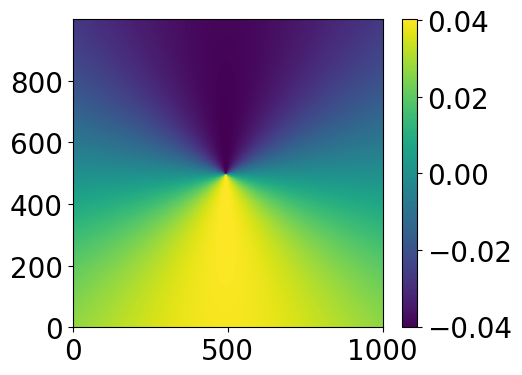

In [20]:
plt.figure(figsize=((5,4)))
plt.pcolormesh(np.diff(file.ULAT, axis=0))
plt.colorbar()

In [21]:
# => the patial resolution is 0.04°
# in km:

0.04 * 60 * 1.852

4.4448